# Churn prediction for a telecom company

## Problem Statement

Client for this project is a Telecom Service Provider. The company suffers from the following problem:

- Due to the boom in the telecom industry with 4G technology, it has become a pain in the neck for the company to retain their customers.

### Our Role

- We are given datasets of past customers and their status (Churn: Yes or No).
- Our task is to build a classification model using the dataset.
- Because there was no machine learning model for this problem in the company, we don’t have a quantifiable win condition. We - need to build the best possible model.

### Project Deliverables

- Deliverable: Predict whether a customer will churn or not..
- Machine Learning Task: Classification
- Target Variable: Churn (Yes / No)
- Win Condition: N/A (best possible model)


## Data Description

We are provided with the dataset containing all the necessary information about the customers like their Gender, MonthlyCharges, TotalCharges, PaymentMethod, InternetService, etc.

Also included in the dataset is the column Churn which classifies whether the customer will churn or not.

The dataset is divided into Train and Test sets.

#### Train Set:
- The train set contains 5634 rows and 21 columns.
- The last column Churn is the target variable.

#### Test Set:
- The test set contains 1409 rows and 20 columns.
- The test set doesn’t contain the Churn column.
- It needs to be predicted for the test set.

### Dataset Feature Description
The Dataset contains the following columns:

|Column Name|| Description |
|------||:----|
|CustomerID|| Passenger Identity|
|Gender|| Whether the customer is a male or a female|
|SeniorCitizen|| Whether the customer is a senior citizen or not (1, 0)|
|Partner|| Whether the customer has a partner or not (Yes, No)|
|Dependents||	Whether the customer has dependents or not (Yes, No)|
|Tenure	Number|| of months the customer has stayed with the company|
|PhoneService||	Whether the customer has a phone service or not (Yes, No)|
|MultipleLines||	Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService||	Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity||	Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup||	Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection||	Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport||	Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV||	Whether the customer has streaming TV or not (Yes, No, No internet service)|
|StreamingMovies||	Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract||	The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling||	Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod||	The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card(automatic))||
|MonthlyCharges||	The amount charged to the customer monthly|
|TotalCharges||	The total amount charged to the customer|
|Churn||	Whether the customer churned or not (Yes or No)|

In [1]:
import numpy as np
import pandas as pd

# import the dataset(train file) from github 
data = pd.read_csv("https://raw.githubusercontent.com/nagraj98/Telecom-Churn-Prediction/master/Telecom-Churn-Data/Churn_train.csv")

# import the dataset(train file) from local folder 
# data = pd.read_csv("Telecom-Churn-Data/Churn_train.csv")

print("Data Shape : ", data.shape)
data.head()

Data Shape :  (5634, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [2]:
# changing column names to standardize them as starting with small letters.
new_col_list = ['customerId', 'gender', 'is_seniorcitizen', 'has_partner', 'has_dependents',
       'tenure', 'has_phoneService', 'multipleLines', 'has_internetService',
       'onlineSecurity', 'onlineBackup', 'deviceProtection', 'techSupport',
       'streamingTV', 'streamingMovies', 'contract', 'has_paperlessBilling',
       'paymentMethod', 'monthlyCharges', 'totalCharges', 'churn']
data.columns = new_col_list
data.columns

Index(['customerId', 'gender', 'is_seniorcitizen', 'has_partner',
       'has_dependents', 'tenure', 'has_phoneService', 'multipleLines',
       'has_internetService', 'onlineSecurity', 'onlineBackup',
       'deviceProtection', 'techSupport', 'streamingTV', 'streamingMovies',
       'contract', 'has_paperlessBilling', 'paymentMethod', 'monthlyCharges',
       'totalCharges', 'churn'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerId            5634 non-null   object 
 1   gender                5634 non-null   object 
 2   is_seniorcitizen      5634 non-null   int64  
 3   has_partner           5634 non-null   object 
 4   has_dependents        5634 non-null   object 
 5   tenure                5634 non-null   int64  
 6   has_phoneService      5634 non-null   object 
 7   multipleLines         5634 non-null   object 
 8   has_internetService   5634 non-null   object 
 9   onlineSecurity        5634 non-null   object 
 10  onlineBackup          5634 non-null   object 
 11  deviceProtection      5634 non-null   object 
 12  techSupport           5634 non-null   object 
 13  streamingTV           5634 non-null   object 
 14  streamingMovies       5634 non-null   object 
 15  contract             

### Insights:

1. customerId can be dropped. Information of column phoneService is included in the column multipleLines, so phoneService can be dropped. 
2. There don't seem to be any null values.
3. 'totalCharges' has DType as object instead of float, this needs to be investigated. This might have hidden null values.
4. For columns, 'gender', 'has_partner', 'has_dependents','has_internetService','onlineSecurity', 'onlineBackup','deviceProtection', 'techSupport','streamingTV', 'streamingMovies', 'has_PaperlessBilling', 'paymentMethod', there is **no inherent order** to the categories, hence we can go for **onehot encoding**.
5. For columns, multipleLines and contract, there is some **ordinality**. For example, 2 year contract is better than 1 year contract, and multiple lines is better than single line, which is better than no line. As there is an ordinality, we can go for **ordinal encoding** (which can be implemented using labelEncoding as well)


In [4]:
# "labels =" is not needed, but gives more readability. 
data.drop(labels=['customerId','has_phoneService'],axis=1,inplace=True)

In [5]:
data.describe(include='all')

,gender,is_seniorcitizen,has_partner,has_dependents,tenure,multipleLines,has_internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,has_paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
count,5634,5634.000000,5634,5634,5634.000000,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634.000000,5634,5634
unique,2,NaN,2,2,NaN,3,3,3,3,3,3,3,3,3,2,4,NaN,5291,2
top,Male,NaN,No,No,NaN,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,2838,NaN,2932,3968,NaN,2700,2479,2801,2498,2473,2781,2246,2213,3104,3321,1893,NaN,8,4113
mean,NaN,0.161874,NaN,NaN,32.277955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.779127,NaN,NaN
std,NaN,0.368368,NaN,NaN,24.555211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.104993,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.400000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.375000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


On checking the distribution, we understand that the data is imbalanced with more records with th Churn Column as No

<AxesSubplot:xlabel='churn', ylabel='count'>

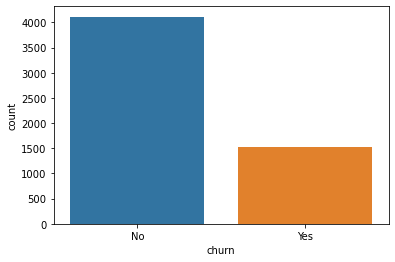

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# checking the distribution/balance of the data, using the target variable - churn
sns.countplot(x = data.churn)

###### For identifying the null values in the totalCharges column, which is of DType object:

To determine, what the exact type of the data is, we try finding a particular row by the totalCharges

`train_data[train_data['totalCharges'] == 258.35]`

above doesn't return the row, while below one returns the row, hence we know that these are **strings**.

`train_data[train_data['totalCharges'] == '258.35']`

Then we try to search for missing values

` train_data[train_data['totalCharges'] == '']
 train_data[train_data['totalCharges'] == 'NaN']
 train_data[train_data['totalCharges'] == 'NA']
 train_data[train_data['totalCharges'] == 'na']`

In [7]:
# searching for missing values.
data[data['totalCharges'] == ' ']

,gender,is_seniorcitizen,has_partner,has_dependents,tenure,multipleLines,has_internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,has_paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
899,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
2224,Female,0,Yes,Yes,0,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
2697,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
3054,Male,0,Yes,Yes,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3488,Male,0,No,Yes,0,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
4056,Female,0,Yes,Yes,0,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
4761,Female,0,Yes,Yes,0,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
5607,Male,0,No,Yes,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No


##### Converting the column type from object to float/numeric

As the totalCharges should be actually numerical values, we convert the type from object to numeric

**with pd.to_numeric, we need to pass an argument callled errors, which is by default 'raise'**

Errors has these 3 values :
-     ignore - if a non-numeric record is found, it doesn't change it.
-     coerce - changes the non-numeric record to na values
-     raise - raises an exception

hence ignore and coerce are used as inbuilt exception handling.

In our case, the empty records are spaces, ie non-numeric. So we use coerce to change those to null values

In [8]:
cols = ['totalCharges']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

#Because tenure is 0 for the records with empty totalCharges values, we fill totalCharges with 0 as well.
data.totalCharges.fillna(0,inplace=True)

###### One-Hot Encoding for particular columns selected :

Applying onehot encoding for the columns mentioned earlier

In [9]:
onehotEncoded = pd.get_dummies(data[['gender','has_partner', 'has_dependents','has_internetService','onlineSecurity', 'onlineBackup','deviceProtection', 'techSupport','streamingTV', 'streamingMovies', 'has_paperlessBilling', 'paymentMethod','churn']])
onehotEncoded.head()

,gender_Female,gender_Male,has_partner_No,has_partner_Yes,has_dependents_No,has_dependents_Yes,has_internetService_DSL,has_internetService_Fiber optic,has_internetService_No,onlineSecurity_No,...,streamingMovies_No internet service,streamingMovies_Yes,has_paperlessBilling_No,has_paperlessBilling_Yes,paymentMethod_Bank transfer (automatic),paymentMethod_Credit card (automatic),paymentMethod_Electronic check,paymentMethod_Mailed check,churn_No,churn_Yes
0,0,1,0,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0
1,1,0,1,0,1,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,1
2,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,1,0,1,0,1,1,0,0,0,...,0,1,1,0,0,0,1,0,1,0
4,0,1,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0


###### columns to be dropped, so as to avoid the dummy-variable-trap

`['gender_Male', 'has_partner_No', 'has_dependents_No', 'has_internetService_Fiber optic', 'onlineSecurity_No internet service', 'onlineBackup_No internet service','deviceProtection_No internet service', 'techSupport_No internet service', 'streamingTV_No internet service', 'streamingMovies_No internet service', 'has_paperlessBilling_No','paymentMethod_Mailed check', 'churn_No']`

These were selected because using dropFirst, the resulting data had many "No Internet Service" columns. All these had perfect correlation (1.0) among themselves, which is the worst case we can have. So we drop the noInternetService columns, instead of using drop_First.

In [10]:
onehotEncoded.drop(labels=['gender_Male', 'has_partner_No', 'has_dependents_No', 'has_internetService_Fiber optic', 'onlineSecurity_No internet service', 'onlineBackup_No internet service','deviceProtection_No internet service', 'techSupport_No internet service', 'streamingTV_No internet service', 'streamingMovies_No internet service', 'has_paperlessBilling_No','paymentMethod_Mailed check', 'churn_No'], 
                      axis=1, inplace=True)
onehotEncoded.head()

,gender_Female,has_partner_Yes,has_dependents_Yes,has_internetService_DSL,has_internetService_No,onlineSecurity_No,onlineSecurity_Yes,onlineBackup_No,onlineBackup_Yes,deviceProtection_No,...,techSupport_Yes,streamingTV_No,streamingTV_Yes,streamingMovies_No,streamingMovies_Yes,has_paperlessBilling_Yes,paymentMethod_Bank transfer (automatic),paymentMethod_Credit card (automatic),paymentMethod_Electronic check,churn_Yes
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,1,0,1,0,...,1,1,0,0,1,0,0,1,0,1
2,0,1,0,1,0,0,1,0,1,1,...,1,1,0,1,0,0,1,0,0,0
3,0,1,1,1,0,0,1,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,0,0,1,0,0,1,0,1,1,...,1,0,1,1,0,0,0,0,1,0


###### Ordinal encoding :

- Using Label encoder for contract column works because
    - label encoder uses an alphabetical order, 
    - alphabetical order matches with the order that we want
    - Contract - month-to-month(0), One Year(1), Two Year(2)


- For the multipleLines column, we perform the manual ordinal encoding using the map function.
    - for map, we are passing a dict as parameter. Another possible way is to pass a function.
    - MultipleLines - Not a phone user(0), no(1), yes(2)
    
Ideally, we should avoid using label encoding even if the order matches the requirement, but here it is used to just show that its possible.


In [11]:
#label encoding
from sklearn.preprocessing import LabelEncoder

LabEnc = LabelEncoder()
ordinalEncoded = data[['contract']].apply(LabEnc.fit_transform)


# ordinal encoding
multipleLines_map = {'No phone service':0,
                     'No':1,
                     'Yes':2}
ordinalEncoded['multipleLines'] = data.multipleLines.map(multipleLines_map)

ordinalEncoded.head()

,contract,multipleLines
0,2,1
1,1,1
2,2,2
3,1,2
4,1,1


##### Creating the new dataframe using the encoded columns, to be used for training.

In [12]:
data_df = data[['tenure','monthlyCharges', 'totalCharges']]
data_df = pd.concat(objs=[data_df,ordinalEncoded, onehotEncoded], axis=1)
data_df.head()

,tenure,monthlyCharges,totalCharges,contract,multipleLines,gender_Female,has_partner_Yes,has_dependents_Yes,has_internetService_DSL,has_internetService_No,...,techSupport_Yes,streamingTV_No,streamingTV_Yes,streamingMovies_No,streamingMovies_Yes,has_paperlessBilling_Yes,paymentMethod_Bank transfer (automatic),paymentMethod_Credit card (automatic),paymentMethod_Electronic check,churn_Yes
0,12,19.70,258.35,2,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,42,73.90,3160.55,1,1,1,0,0,1,0,...,1,1,0,0,1,0,0,1,0,1
2,71,65.15,4681.75,2,2,0,1,0,1,0,...,1,1,0,1,0,0,1,0,0,0
3,71,85.45,6300.85,1,2,0,1,1,1,0,...,1,0,1,0,1,0,0,0,1,0
4,30,70.40,2044.75,1,1,0,0,0,1,0,...,1,0,1,1,0,0,0,0,1,0


<AxesSubplot:>

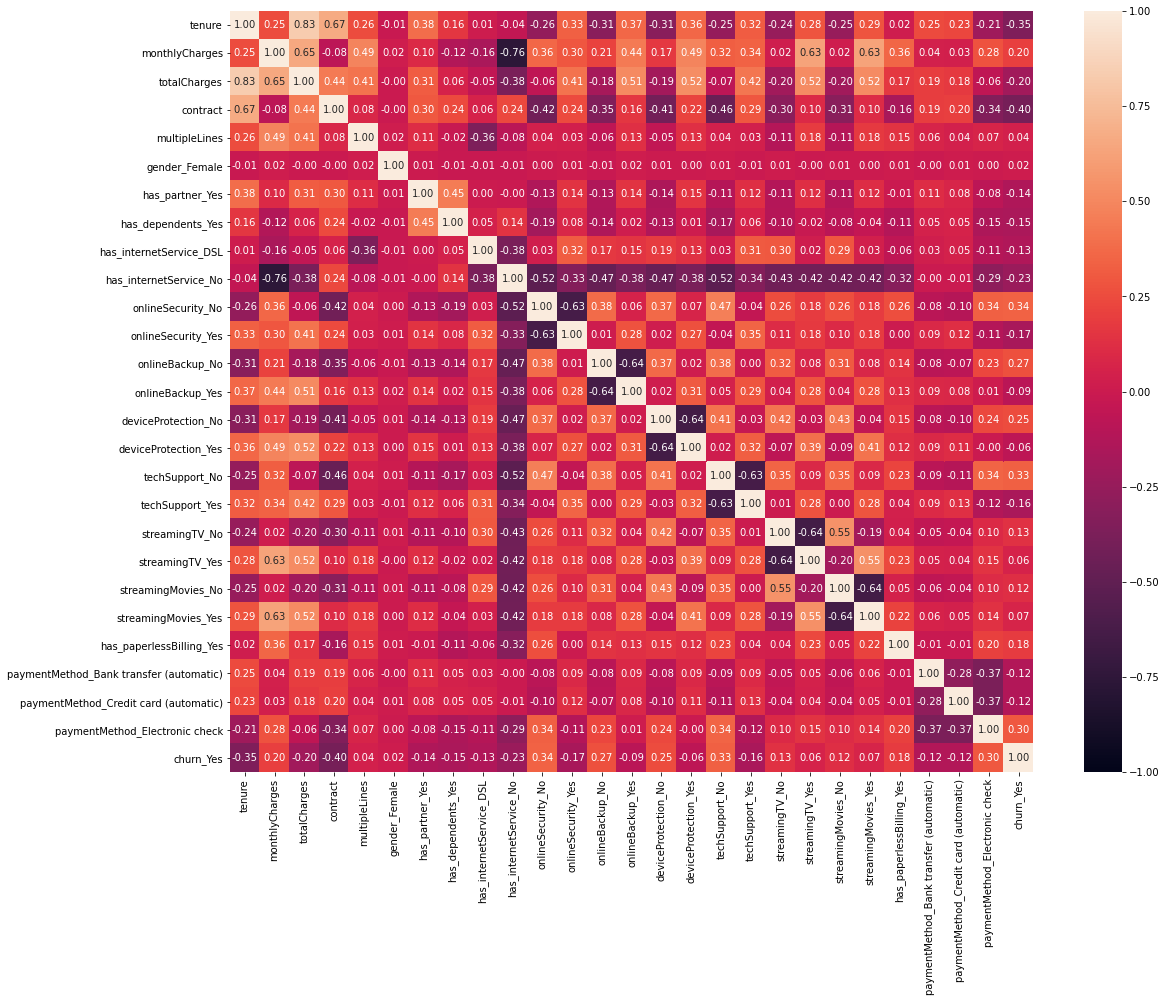

In [13]:
#Plotting the heatmap to check the correlations among different columns.
plt.figure(figsize=[18,14])
sns.heatmap(data_df.corr(),annot=True,vmin=-1, vmax=1, fmt = '.2f')

**Low correlation with target - Churn (safe to ignore)** :
   - multipleLines(0.04)
   - gender_Female(-.02)
   - ~~onlineBackup_Yes~~(-.09)
   - ~~deviceProtection_Yes~~(-.06)
   - ~~streamingTV_yes~~(.06)
   - ~~streamingMovies_Yes~~(.07)
   
**Significant correlation with target - Churn**:
   - tenure (-.35)
   - contract (-.40)
   - onlineSecurity_No (.34)
   - techSupport_No (.33)
   - paymentMethod_electronic Check (.3)

**High correlation among themselves** :
   - tenure / ~~totalCharges~~ (.83)
   - tenure / contract (.67)
   
   - monthlyCharges / ~~totalCharges~~ (.65)
   - monthlyCharges / ~~multipleLines~~ (.49)
   - monthlyCharges / ~~has_internetService_No~~ (-.76)
   - monthlyCharges / ~~streamingTV_Yes~~ (.63)
   - monthlyCharges / ~~streamingMovies_Yes~~ (.63)
   
   - contract /techSupport_No (-.46)
   
   - ~~totalCharges~~ / ~~onlineBackup_Yes~~ (.51)
   - ~~totalCharges~~ / ~~deviceProtection_Yes~~ (.52)
   - ~~totalCharges~~ / ~~streamingTV_Yes~~ (.52)
   - ~~totalCharges~~ / ~~streamingMovies_Yes~~ (.52)

   - has_partner_Yes/has_dependents_Yes (.45)
   
   - ~~has_internetService_No~~ / onlineSecurity_No (-.52)
   - ~~has_internetService_No~~ / onlineBackup_No (-.47)
   - ~~has_internetService_No~~ / deviceProtection_No (-.47)
   - ~~has_internetService_No~~ / techSupport_No (-.52)
   
   - onlineSecurity_No / ~~onlineSecurity_Yes~~ (-.63)
   - onlineBackup_No / ~~onlineBackup_Yes~~ (-.64)
   - deviceProtection_No / ~~deviceProtection_Yes~~ (-.64)
   - techSupport_No / ~~techSupport_Yes~~ (-.63)
   - streamingTV_No / ~~streamingTV_Yes~~ (-.64)
   - streamingMovies_No / ~~streamingMovies_Yes~~ (-.64)

**Following columns will be safely dropped because they are causing multicollinearity, as well as not contributing to the target variable much.**


1. multipleLines
2. streamingTV_Yes
3. streamingMovies_Yes
4. onlineBackup_Yes
5. deviceProtection_Yes
6. onlineSecurity_Yes
7. techSupport_Yes

**For other columns causing collinearity, we tried building models and checked the effects.**

We saw that the model is giving importance to features differently than the correlations with target :
- contract has the highest corr with churn, but model gives it less importance than tenure and total charges.
- model gives totalCharges the second most importance, whereas correltaion wise, it is 7th (behind contract, tenure, onlineSecurity_No, techSupport_No, paymentMethod_Electronic check, and monthlyCharges)
- onlineSecurity_No which has the 3rd highest correlation, gets the 6th most importance by the model (behind tenure, totalCharges, contract, monthlyCharges, has_internetService_No)

There were many such discrepancies, and these may be caused because of the multicollinearity in the independant variables.
So We try to reduce this multicollinearity further.

The information in column **totalCharges**, can be found in the information of columns tenure and monthlyCharges. Also the absolute correlation of totalCharges(-0.196353) with churn is less than that of the said columns of tenure(-0.351885) and monthlyCharges(0.196805) **So we can drop this column**.

The collective information in **has_internetService_No**, can be found in monthlyCharges, onlineSecurity_No, onlineBackup_No, deviceProtection_No, techSupport_No, etc. Also, the absolute correlation of has_internetService_No(-0.227684) is less than that of the said columns of onlineSecurity_No(0.338102), onlineBackup_No(0.270107), deviceProtection_No(0.250856), techSupport_No(0.331247). **So we can drop this column as well**.

That removes most of the highest correlations (-.76, .83, .65, etc) and we are left with only 3 pairs of multicollinear variables:
   - has_partner_Yes/has_dependents_Yes(.45)
   - contract/techSupport_No(-.46)
   - tenure/contract (.67)

But tenure, contract, and techSupport_No all are important columns, hence we can't drop them.

In [14]:
data_df.drop(['multipleLines','streamingTV_Yes','streamingMovies_Yes','onlineBackup_Yes','deviceProtection_Yes','onlineSecurity_Yes','techSupport_Yes','totalCharges','has_internetService_No'],axis=1,inplace=True)

<AxesSubplot:>

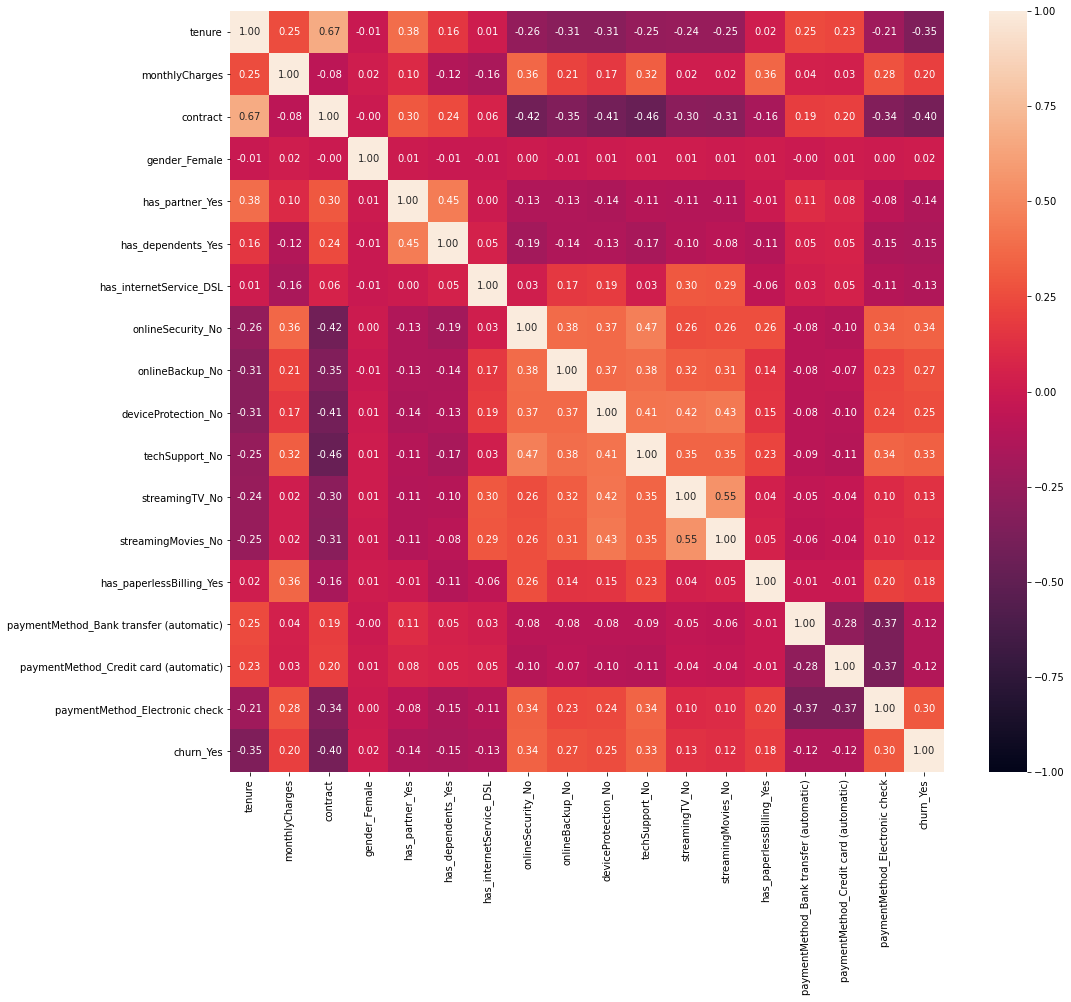

In [15]:
# Now checking the heatmap again
plt.figure(figsize=[16,14])
sns.heatmap(data_df.corr(),annot=True,vmin=-1, vmax=1, fmt='.2f')

Lets build the model and check the accuracy

###### Splitting the data into train and test

In [16]:
from sklearn.model_selection import train_test_split

x = data_df[data_df.columns[:-1]]
y = data_df['churn_Yes']
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2, random_state=1)

###### Scaling the columns

The tenure, monthlyCharges and contract columns need to be scaled.

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

x_valid_scaled = scaler.transform(x_valid)

###### Initialising the LogisticRegression classifier, and using GridSearch to tune its hyperparameters.

As this is the first model the company is building, a simple logistic regression classifier should work.

- We are considering 30 values from 0.001 to 1000 for C.
- In gridsearch, we are using 10 fold cross-validation (ie "90:10 :: training:validation" split)
- n_jobs = -1 tells it to use all the available cores for parallel computing.

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()


from sklearn.model_selection import GridSearchCV

C = np.logspace(-3,3,30)
max_iter = [125, 150]

parameters = {'C':C, 'max_iter':max_iter}

GS_lr = GridSearchCV(logreg, parameters, cv = 10, n_jobs=-1)

In [19]:
GS_lr.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.61026203e-03, 2.59294380e-03, 4.17531894e-03,
       6.72335754e-03, 1.08263673e-02, 1.74332882e-02, 2.80721620e-02,
       4.52035366e-02, 7.27895384e-02, 1.17210230e-01, 1.88739182e-01,
       3.03919538e-01, 4.89390092e-01, 7.88046282e-01, 1.26896100e+00,
       2.04335972e+00, 3.29034456e+00, 5.29831691e+00, 8.53167852e+00,
       1.37382380e+01, 2.21221629e+01, 3.56224789e+01, 5.73615251e+01,
       9.23670857e+01, 1.48735211e+02, 2.39502662e+02, 3.85662042e+02,
       6.21016942e+02, 1.00000000e+03]),
                         'max_iter': [125, 150]})

In [20]:
print("\n The best score across ALL searched params:\n",GS_lr.best_score_)
print("\n The best parameters across ALL searched params:\n",GS_lr.best_params_)


 The best score across ALL searched params:
 0.7954313870411431

 The best parameters across ALL searched params:
 {'C': 0.4893900918477494, 'max_iter': 125}


According to GridSearch, the best params are C = 0.489, max_iter = 125, so we build the classifier model with these params.

In [21]:
lr_clf = LogisticRegression(C=0.49, max_iter=125)
lr_clf.fit(x_train_scaled, y_train)

LogisticRegression(C=0.49, max_iter=125)

In [22]:
print(f"Training Accuracy : {lr_clf.score(x_train_scaled,y_train)}")
print(f"Validation Accuracy : {lr_clf.score(x_valid_scaled,y_valid)}")

Training Accuracy : 0.7963168404703794
Validation Accuracy : 0.8012422360248447


**We have got a decent model with 80% accuracy.**

Further improvement in accuracy cannot be attained by using the logistic regression model.

Following things were tried before reaching to this conclusion:
- not using any scaling
- using standardscaler
- not dropping the extra dummy variables
- not dropping the multicollinearity causing columns
- using liblinear solver

Things not tried :
- using different solvers like saga in logreg.
- using smoting techniques to balancing the data.

###### But as this is a classification problem, and that too with an imbalance in the data towards the negative samples (No churn samples), accuracy is not the best metric to assess the model. We need to look at Precision and Recall. 

Precision in this case will mean the percentage of total predicted positives, that were actually positive. Similarly Recall in this case will mean the percentage of actual positives that were predicted correctly. For Churn prediction, as the aim is to try to retain the churning customers, by giving them incentives, it is more important to predict more actual positives correctly, ie **Recall is more important**.

###### Lets go ahead with calculating these values.

In [23]:
# We will use sklearns confusion matrix, 
# but we also need to write some functions to plot this matrix and extract error metrics from it

# plotting confusion matrix

def plot_confusion_matrix(CM, labels=['Predicted','Actual'], ticklabels=['No','Yes'] ):
    ax = sns.heatmap(CM, annot=True, cmap='Blues', fmt='.4g')

    ax.set_title('Confusion matrix')
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])

    ax.xaxis.set_ticklabels(ticklabels)
    ax.yaxis.set_ticklabels(ticklabels)

    plt.show()


# calculating the error metrics based on the confusion matrix

def cm_error_metrics(CM, print_results=True):
    """
    This function calculates the error metrics for a binary classification problem.
    Returns the following tuple with all error metrics
    (accuracy, precision, recall, specificity, fscore)
    
    Make sure that the structure of the cm is as follows:
    [[TN , FP]
     [FN , TP]]
     
    good resource for the definitions for these terms : 
    https://deepai.org/machine-learning-glossary-and-terms/precision-and-recall
    
    1. Precision measures what percent of the predicted positives were actual positives.
    
    2. Recall measures what percent of the actual positives were predicted correctly.
        Recall is also known as the sensitivity.
        Recall is also called as the True positivity rate
    
    3. F-score is the harmonic mean of precision and recall, ie
        f-score = 2*(precision*recall)/(precision+recall)
    
    4. Specificity measures what percent of the actual negatives were predicted correctly.
    
    """
    TN = CM[0,0]
    FP = CM[0,1]
    FN = CM[1,0]
    TP = CM[1,1]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    specificity = TN/(TN+FP)
    fscore = 2*(precision*recall)/(precision+recall)
    
    if(print_results):
        print(f"Overall Accuracy = {accuracy}")
        print(f"Precision = {precision}")
        print(f"Recall = {recall}")
        print(f"Specificity = {specificity}")
        print(f"F-score = {fscore}")
        
    
    return (accuracy, precision, recall, specificity, fscore)

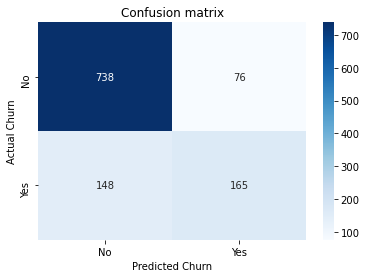

Overall Accuracy = 0.8012422360248447
Precision = 0.6846473029045643
Recall = 0.5271565495207667
Specificity = 0.9066339066339066
F-score = 0.5956678700361011


In [24]:
# The target variable is churn_yes, so 0 means no churn and 1 means churn.
# Sklearn Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.

from sklearn.metrics import confusion_matrix

preds_lr5 = lr_clf.predict(x_valid_scaled)
cm_lr5 = confusion_matrix(y_valid, preds_lr5)
plot_confusion_matrix(cm_lr5, ['Predicted Churn','Actual Churn'], ticklabels=['No','Yes'])

metrics_lr5 = cm_error_metrics(cm_lr5)

In [25]:
# Now we will write a function for plotting the roc curve along with its thresholds

# plotting a colourcoded roc with thresholds
from sklearn.metrics import roc_curve, roc_auc_score, auc

def plot_roc(labels, predictions, thresholds_every=10, title='', cmap = 'copper'):
    # fp: false positive rates. tp: true positive rates
    #   fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions, pos_label=positive_label)
    fp, tp, thresholds = roc_curve(labels, predictions)
    roc_auc = auc(fp, tp)
    plt.figure(figsize=(6, 6))
    plt.plot(fp, tp, label=f"ROC curve (area = {roc_auc:.3f})", color='purple')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.ylabel('Sensitivity (TPR)')
    plt.xlabel('1-Specificity(FPR)')
    plt.xlim([-0.03, 1.0])
    plt.ylim([0.0, 1.03])
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    
    # plot some thresholds
    thresholdsLength = len(thresholds)
    colorMap=plt.get_cmap(cmap, thresholdsLength)
    for i in range(0, thresholdsLength, thresholds_every):
        threshold_value_with_max_two_decimals = str(thresholds[i])[:4]
        plt.text(fp[i], tp[i], threshold_value_with_max_two_decimals, fontdict={'size': 10}, color=colorMap(i/thresholdsLength));
        
    plt.show()

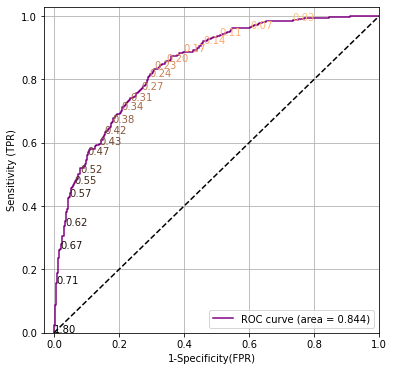

In [26]:
y_pred_probs = lr_clf.predict_proba(x_valid_scaled)[:,1]
plot_roc(y_valid, y_pred_probs, thresholds_every=15)

In [27]:
# Writing a function to predict based on a threshold

def predict_with_thresholds(classifier, x_test, threshold):

    """
    Utilise the best threshold found from ROC curve to change the predictions
    """
    positive_probabilities = classifier.predict_proba(x_test)[:,1]
    predictions = (positive_probabilities > threshold).astype(int)
    
    return predictions

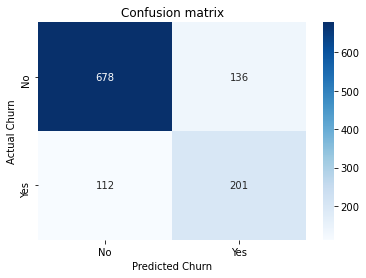

Overall Accuracy = 0.7799467613132209
Precision = 0.5964391691394659
Recall = 0.6421725239616614
Specificity = 0.8329238329238329
F-score = 0.6184615384615385


In [28]:
preds_lr4 = predict_with_thresholds(lr_clf, x_valid_scaled, 0.4)

cm_lr4 = confusion_matrix(y_valid, preds_lr4)
plot_confusion_matrix(cm_lr4, ['Predicted Churn','Actual Churn'], ticklabels=['No','Yes'])
metrics_lr4 = cm_error_metrics(cm_lr4)

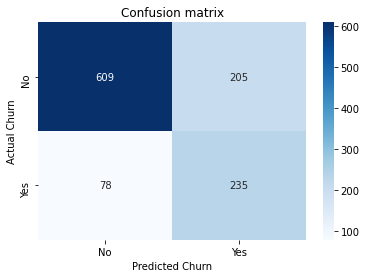

Overall Accuracy = 0.748890860692103
Precision = 0.5340909090909091
Recall = 0.7507987220447284
Specificity = 0.7481572481572482
F-score = 0.6241699867197875


In [29]:
preds_lr3 = predict_with_thresholds(lr_clf, x_valid_scaled, 0.3)

cm_lr3 = confusion_matrix(y_valid, preds_lr3)
plot_confusion_matrix(cm_lr3, ['Predicted Churn','Actual Churn'], ticklabels=['No','Yes'])
metrics_lr3 = cm_error_metrics(cm_lr3)

##### Now we will try using a different classification algorithm - decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

criterion = ["gini","entropy"]
max_depth = np.linspace(1, 16, 16)


parameters = {'criterion':criterion, 'max_depth':max_depth}

GS_dt = GridSearchCV(dtree, parameters, cv = 10, n_jobs=-1)

GS_dt.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])})

In [31]:
print("\n The best score across ALL searched params:\n",GS_dt.best_score_)
print("\n The best parameters across ALL searched params:\n",GS_dt.best_params_)


 The best score across ALL searched params:
 0.7887809805370781

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 5.0}


In [32]:
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=6)
dt_clf.fit(x_train_scaled, y_train)
print(f"Training Accuracy : {dt_clf.score(x_train_scaled,y_train)}")
print(f"Validation Accuracy : {dt_clf.score(x_valid_scaled,y_valid)}")

Training Accuracy : 0.8054138007543821
Validation Accuracy : 0.7950310559006211


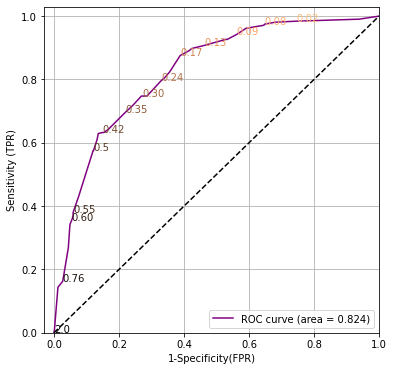

In [33]:
y_pred_probs_dtree = dt_clf.predict_proba(x_valid_scaled)[:,1]
plot_roc(y_valid, y_pred_probs_dtree, thresholds_every=3)

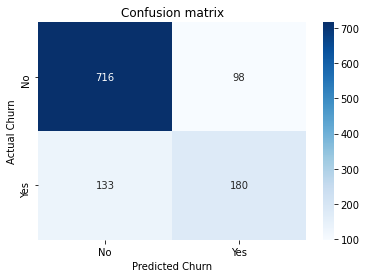

Overall Accuracy = 0.7950310559006211
Precision = 0.6474820143884892
Recall = 0.5750798722044729
Specificity = 0.8796068796068796
F-score = 0.6091370558375635


In [35]:
preds_dt5 = dt_clf.predict(x_valid_scaled)
cm_dt5 = confusion_matrix(y_valid, preds_dt5)
plot_confusion_matrix(cm_dt5, ['Predicted Churn','Actual Churn'], ticklabels=['No','Yes'])
metrics_dt5 = cm_error_metrics(cm_dt5)

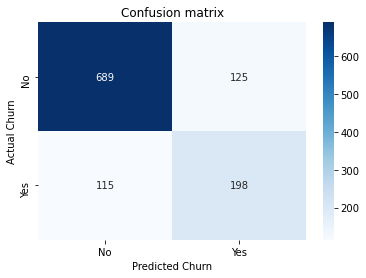

Overall Accuracy = 0.7870452528837621
Precision = 0.6130030959752322
Recall = 0.6325878594249201
Specificity = 0.8464373464373465
F-score = 0.6226415094339622


In [36]:
preds_dt4 = predict_with_thresholds(dt_clf, x_valid_scaled, 0.4)

cm_dt4 = confusion_matrix(y_valid, preds_dt4)
plot_confusion_matrix(cm_dt4, ['Predicted Churn','Actual Churn'], ticklabels=['No','Yes'])
metrics_dt4 = cm_error_metrics(cm_dt4)

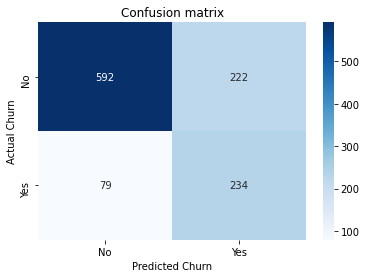

Overall Accuracy = 0.7329192546583851
Precision = 0.5131578947368421
Recall = 0.7476038338658147
Specificity = 0.7272727272727273
F-score = 0.6085825747724317


In [37]:
preds_dt3 = predict_with_thresholds(dt_clf, x_valid_scaled, 0.3)

cm_dt3 = confusion_matrix(y_valid, preds_dt3)
plot_confusion_matrix(cm_dt3, ['Predicted Churn','Actual Churn'], ticklabels=['No','Yes'])
metrics_dt3 = cm_error_metrics(cm_dt3)

In [40]:
results_df = pd.DataFrame({
    'Classifier':['logreg.5','logreg.4', 'logreg.3', 'dtree.5', 'dtree.4', 'dtree.3'],
    'Accuracy':[metrics_lr5[0], metrics_lr4[0], metrics_lr3[0], metrics_dt5[0], metrics_dt4[0], metrics_dt3[0]],
    'Precision':[metrics_lr5[1], metrics_lr4[1], metrics_lr3[1], metrics_dt5[1], metrics_dt4[1], metrics_dt3[1]],
    'Recall':[metrics_lr5[2], metrics_lr4[2], metrics_lr3[2], metrics_dt5[2], metrics_dt4[2], metrics_dt3[2]],
    'Specificity':[metrics_lr5[3], metrics_lr4[3], metrics_lr3[3], metrics_dt5[3], metrics_dt4[3], metrics_dt3[3]],
    'F-Score':[metrics_lr5[4], metrics_lr4[4], metrics_lr3[4], metrics_dt5[4], metrics_dt4[4], metrics_dt3[4]]
})
results_df

,Classifier,Accuracy,Precision,Recall,Specificity,F-Score
0,logreg.5,0.801242,0.684647,0.527157,0.906634,0.595668
1,logreg.4,0.779947,0.596439,0.642173,0.832924,0.618462
2,logreg.3,0.748891,0.534091,0.750799,0.748157,0.624170
3,dtree.5,0.795031,0.647482,0.575080,0.879607,0.609137
4,dtree.4,0.787045,0.613003,0.632588,0.846437,0.622642
5,dtree.3,0.732919,0.513158,0.747604,0.727273,0.608583


##### Inference

- Overall we see that the maximum recall for both the algorithms is achieved with **threshold = 0.3**
- Of those two with 0.3 threshold, logreg gives both better recall(0.750799) and better precision(0.534091) than that of dtree
- Another model with a f-score comparable to logreg.3 is the dtree.4 model which gives comparable recall and precision.

The classifier to be used will depend on the company's constraints.
1. If the company is ready to spend more on false positives (people predicted to churn but actually won't churn), to correctly identify more true positives (people who would actually churn), then we would suggest the logreg.3 model.
2. If the company wants to reduce it's expense and is ready to let go some percent of true positives, and wants a balance between recall and precision, we would suggest the dtree.4 model

Assuming that the main concern for the company is recall, we would suggest logreg.3.

##### Now we'll use this model for prediction on the Test(new/live) data

In [23]:
# importing the test data
live_data = pd.read_csv("https://raw.githubusercontent.com/nagraj98/Telecom-Churn-Prediction/master/Telecom-Churn-Data/Churn_test.csv")
live_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


##### Performing the preprocessing on the data

It is important to process the test data in the same way as the train data which was used for training the model.

As we already know what preprocessing steps need to be done, we perform them in one go.

In [24]:
# standardizing the column names
new_col_list = ['customerId', 'gender', 'is_seniorcitizen', 'has_partner', 'has_dependents',
       'tenure', 'has_phoneService', 'multipleLines', 'has_internetService',
       'onlineSecurity', 'onlineBackup', 'deviceProtection', 'techSupport',
       'streamingTV', 'streamingMovies', 'contract', 'has_paperlessBilling',
       'paymentMethod', 'monthlyCharges', 'totalCharges']
live_data.columns = new_col_list

# keeping the customerId in original data, as it is required for the submission file

# onehotencoding of the columns, and dropping the extra dummy variables.
onehotEncoded = pd.get_dummies(live_data[['gender','has_partner', 'has_dependents','has_internetService','onlineSecurity', 'onlineBackup','deviceProtection', 'techSupport','streamingTV', 'streamingMovies', 'has_paperlessBilling', 'paymentMethod']])
onehotEncoded.drop(labels=['gender_Male', 'has_partner_No', 'has_dependents_No', 'has_internetService_Fiber optic', 'onlineSecurity_No internet service', 'onlineBackup_No internet service','deviceProtection_No internet service', 'techSupport_No internet service', 'streamingTV_No internet service', 'streamingMovies_No internet service', 'has_paperlessBilling_No','paymentMethod_Mailed check'], 
                      axis=1, inplace=True)

# dropping the columns causing multicollinearity right away, instead of later.
onehotEncoded.drop(['streamingTV_Yes','streamingMovies_Yes','onlineBackup_Yes','deviceProtection_Yes','onlineSecurity_Yes','techSupport_Yes','has_internetService_No'],axis=1,inplace=True)

# ordinal encoding of contract column,
# multipleLines was anyway going to be dropped, so why bother encoding it.
contract_map = {'Month-to-month':0,
                     'One year':1,
                     'Two year':2}
ordinalEncoded = live_data.contract.map(contract_map)

# forming the new dataset.
# ignoring the totalCharges and has_phoneService columns
# make sure the order of the columns is same as used in the training process.
live_data_df = live_data[['tenure','monthlyCharges']]
live_data_df = pd.concat(objs=[live_data_df,ordinalEncoded, onehotEncoded], axis=1)
live_data_df.head()

#scaling
live_data_scaled = scaler.transform(live_data_df)

In [25]:
# prediction on the new data, using the already trained classifier

results = predict_with_thresholds(lr_clf, live_data_scaled, 0.3)

In [26]:
# creating dataframe as expected for the submission.
result_df = pd.DataFrame({'cust_Id':live_data.customerId, 'churn':results})

# Decoding the values back to categories.
churn_map = {0:'No', 1:'Yes'}
result_df['churn'] = result_df.churn.map(churn_map)

In [27]:
# exporting it as a csv file
# using header=False and index=False to exclude the Column headers and the Row indexes respectively from the file.
result_df.to_csv(path_or_buf="submission.csv", index=False, header=False)